##### LOGISTIC REGRESSION

In [135]:
# Logistic Regression

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [136]:
# Importing the dataset
dataset = pd.read_csv('iris.csv',header=None)
X = dataset.iloc[:, :4].values
y = dataset.iloc[:, 4].values

In [176]:
dataset.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [180]:
dataset.shape

(150, 5)

In [179]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [137]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [144]:
'''BINARY LOGISTIC REGRESSION'''
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, multi_class='auto')
classifier.fit(X_train, y_train)

C:\Users\bijoy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [145]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [146]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [147]:
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

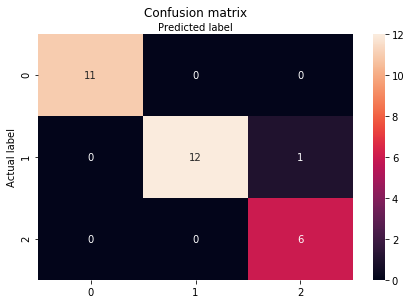

In [148]:
#https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
#class_names=[0,1,2] # name  of classes
class_names=list(dataset.iloc[:,4].unique())
#class_names=['Iris-setosa', 'Iris-versicolor','Iris-versicolor']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [149]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [150]:
y_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [158]:
#cross checking manually how many names are same in y_pred(predicted) & y_test(test set)
x =[True for yp,yt in zip(y_pred,y_test) if yp==yt] 
len(x)


29

In [162]:
#Findinf the incorrect prediction & its index
x =[True if yp==yt else False for yp,yt in zip(y_pred,y_test) ] 
x.index(False)

21

In [163]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("Precision:",metrics.precision_score(y_test, y_pred))--> gives erroe
#print("Recall:",metrics.recall_score(y_test, y_pred))--> gives erroe
#96.67% accuracy is achieved

Accuracy: 0.9666666666666667


In [164]:
class_names=list(dataset.iloc[:,4].unique())
class_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

##### MULTINOMIAL LOGISTIC REGRESSION

In [167]:
'''MULTINOMIAL LOGISTIC REGRESSION'''
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0 ,multi_class='multinomial', solver='newton-cg')
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [168]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [175]:
dataset.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [169]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [170]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [181]:
#cross checking manually how many names are same in y_pred(predicted) & y_test(test set)
x =[True for yp,yt in zip(y_pred,y_test) if yp==yt] 
len(x)


30

In [186]:
#Findinf the incorrect prediction & its index
x =[True if yp==yt else False for yp,yt in zip(y_pred,y_test) ] 
x.index(False)
# error because False is not present

ValueError: False is not in list

##### Compared to Normal Logistic Regression Accuracy is 100% for Multinomial Logistic Regression

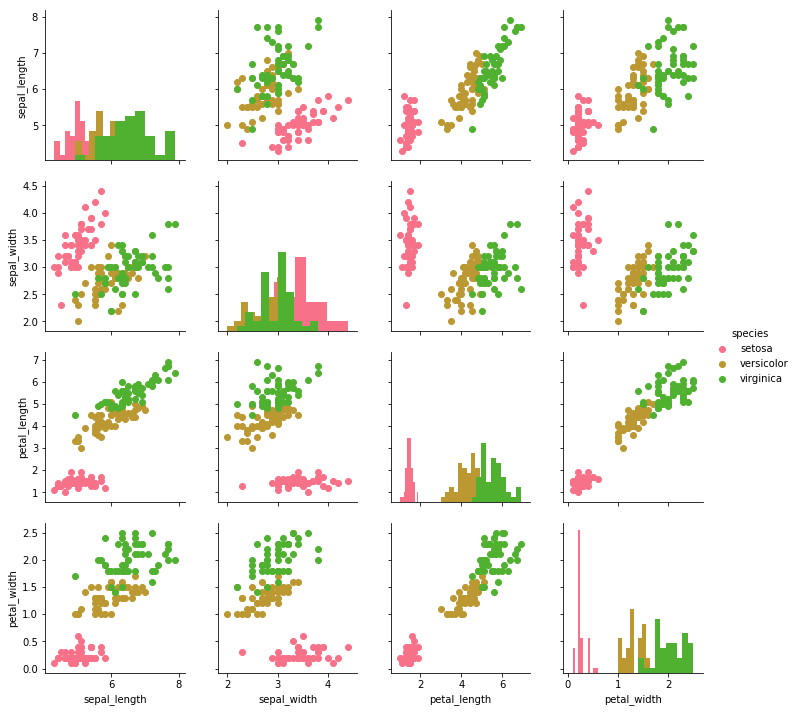

In [171]:
iris = sns.load_dataset("iris")
#class_species=dataset.iloc[:,4]
g = sns.PairGrid(iris, hue="species")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

In [129]:
x=pd.DataFrame(X_test)
x['class']=y_test
x.head()

,0,1,2,3,class
0,6.1,2.6,5.6,1.4,Iris-virginica
1,6.5,3.2,5.1,2.0,Iris-virginica
2,5.0,2.0,3.5,1.0,Iris-versicolor
3,5.5,2.4,3.7,1.0,Iris-versicolor
4,4.4,2.9,1.4,0.2,Iris-setosa


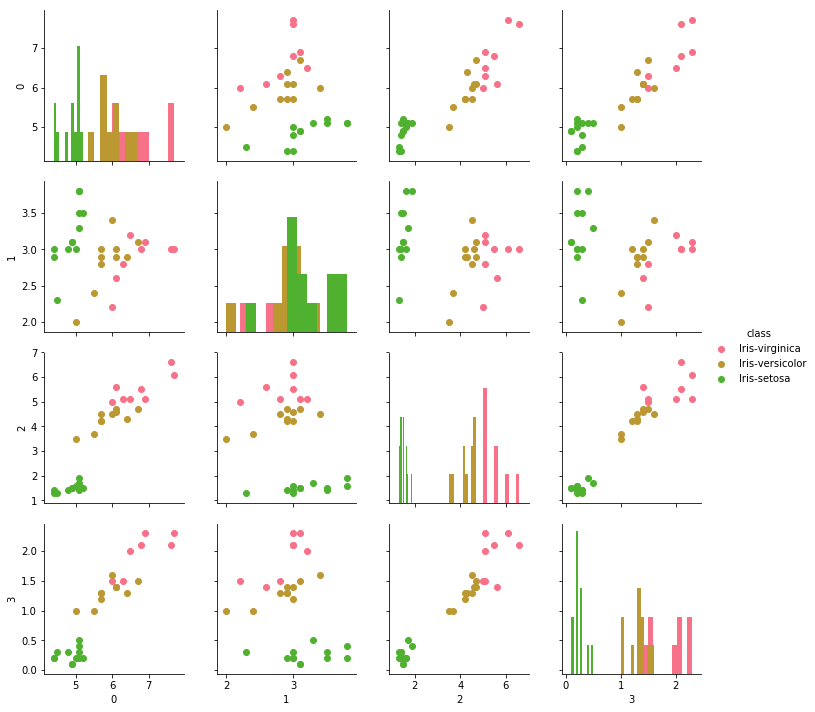

In [134]:
#Creating a dataframe using Test dataset from X & y
x=pd.DataFrame(X_test)
x['class']=y_test
x.head()
g = sns.PairGrid(x, hue='class')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

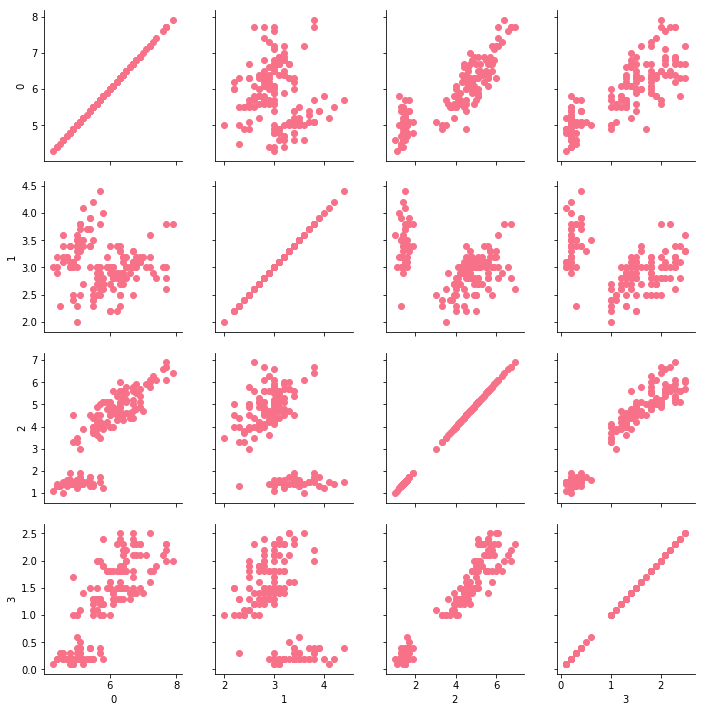

In [172]:
g = sns.PairGrid(dataset)
g.map(plt.scatter);